<a href="https://colab.research.google.com/github/hasanzeynal/TensorFlow-Developer-Certificate/blob/main/Exercises/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score, precision_score

# Exercise 1:
Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [ ]:
#import make_moons() from sklearn
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000,
                 random_state= 42)

#create dataframe
make_moons_df = pd.DataFrame({'X_1': X[:,0],
                              'X_2': X[:,1],
                              'Y': y})

#print make_moons_df
make_moons_df.head()

,X_1,X_2,Y
0,0.008727,0.368174,1
1,0.921384,-0.496905,1
2,0.940226,-0.498212,1
3,0.465875,-0.345406,1
4,-0.850412,0.526117,0


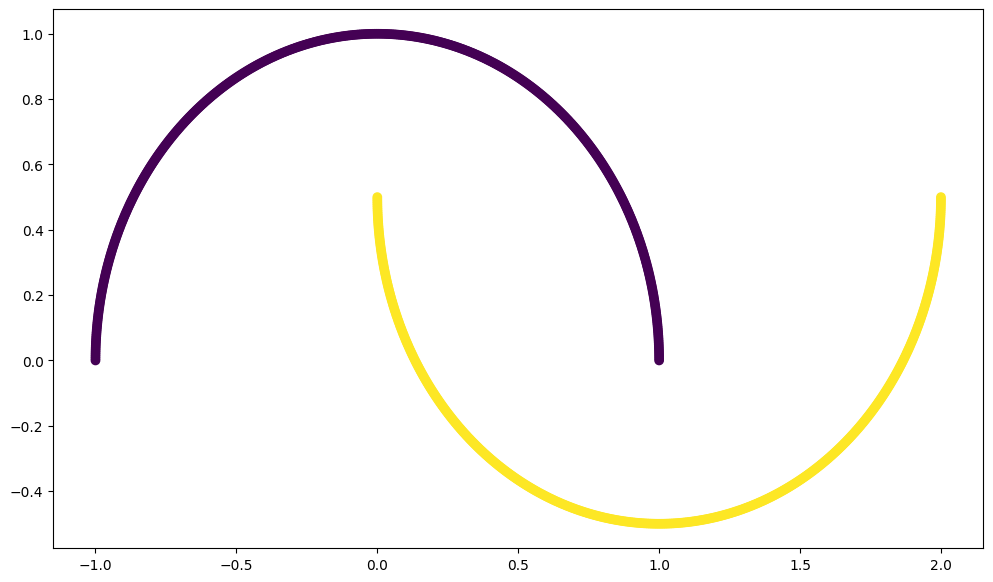

In [ ]:
#plot the dataframe visualization
plt.figure(figsize=(12,7))
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [ ]:
#let's try creating a model with over 85% accuracy

#create the subsets for X and y
X_train= X[:800]
X_test= X[800:]
y_train= y[:800]
y_test= y[800:]

#set the random seed
tf.random.set_seed(42)

#create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

#compile the model
model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics= ['accuracy'])

#set the callback(lr_scheduler which means LearningRateSchduler)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 10 **(epoch/20))

#fit the model
history = model.fit(X_train, y_train, epochs= 30,
          callbacks=[lr_scheduler],
          validation_data= (X_test,y_test))

Epoch 1/30
25/25 [==============================] - 2s 11ms/step - loss: 0.5528 - accuracy: 0.8087 - val_loss: 0.4482 - val_accuracy: 0.8050 - lr: 0.0010
Epoch 2/30
25/25 [==============================] - 0s 5ms/step - loss: 0.3518 - accuracy: 0.8575 - val_loss: 0.3106 - val_accuracy: 0.8300 - lr: 0.0011
Epoch 3/30
25/25 [==============================] - 0s 4ms/step - loss: 0.2628 - accuracy: 0.8813 - val_loss: 0.2631 - val_accuracy: 0.8500 - lr: 0.0013
Epoch 4/30
25/25 [==============================] - 0s 5ms/step - loss: 0.2265 - accuracy: 0.8900 - val_loss: 0.2406 - val_accuracy: 0.8950 - lr: 0.0014
Epoch 5/30
25/25 [==============================] - 0s 4ms/step - loss: 0.1990 - accuracy: 0.9025 - val_loss: 0.2011 - val_accuracy: 0.9000 - lr: 0.0016
Epoch 6/30
25/25 [==============================] - 0s 4ms/step - loss: 0.1725 - accuracy: 0.9050 - val_loss: 0.1749 - val_accuracy: 0.9200 - lr: 0.0018
Epoch 7/30
25/25 [==============================] - 0s 4ms/step - loss: 0.1443 - 

In [ ]:
#make the dataframe for lr's,losses,accuracy and etc.
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,0.552769,0.80875,0.448214,0.805,0.001000
1,0.351779,0.85750,0.310613,0.830,0.001122
2,0.262787,0.88125,0.263103,0.850,0.001259
3,0.226481,0.89000,0.240595,0.895,0.001413
4,0.198984,0.90250,0.201056,0.900,0.001585
5,0.172509,0.90500,0.174887,0.920,0.001778
6,0.144347,0.93875,0.130951,0.940,0.001995
7,0.100853,0.96250,0.083051,0.975,0.002239
8,0.067968,0.97875,0.049602,0.990,0.002512
9,0.033352,0.99625,0.024200,1.000,0.002818


<Figure size 1600x900 with 0 Axes>

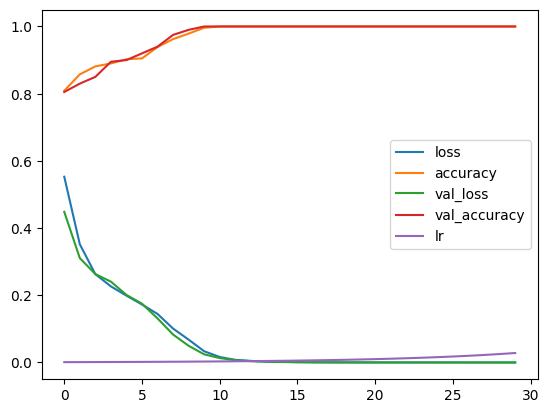

In [ ]:
#visualize the metrics ald lr rates
plt.figure(figsize=(16,9))
pd.DataFrame(history.history).plot()
plt.show()

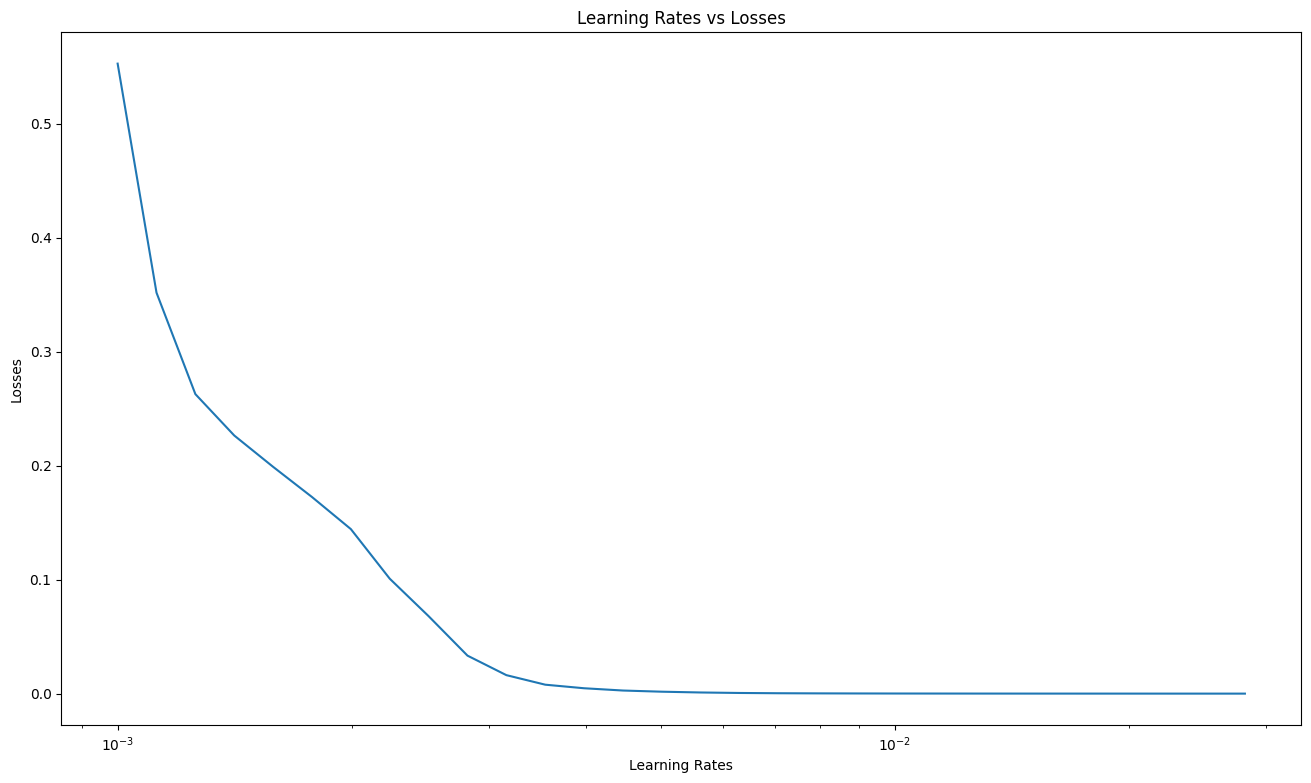

In [ ]:
#make the plot between loss and learning rates

#learning rates
lrs = 0.001 * 10 **(tf.range(30)/20)

#make the plot
plt.figure(figsize=(16,9))
plt.semilogx(lrs,pd.DataFrame(history.history)['loss'])
#set the xlabel and ylabel,title
plt.title('Learning Rates vs Losses')
plt.xlabel('Learning Rates')
plt.ylabel('Losses')
#show the plot
plt.show()

# Exercise 2:
Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time.
* **Hint:** see the classifcation tutorial in the TensorFlow documentation for ideas.

In [42]:
#import fashionmnist datasets
from tensorflow.keras.datasets import fashion_mnist
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

In [43]:
#the shapes of train and test sets
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [44]:
#make the list that has to consist of names of clothes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

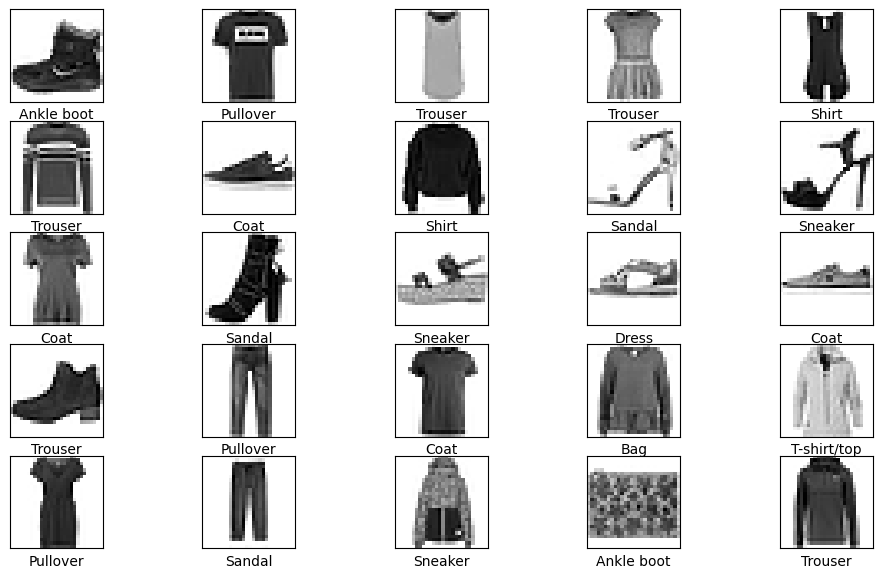

In [45]:
plt.figure(figsize=(12,7))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_data[i], cmap= plt.cm.binary)
  plt.xlabel(class_names[test_labels[i]])
plt.show()

In [75]:
#normilize data
norm_train_data= train_data / 255
norm_test_data= test_data / 255

#set the random seed
tf.random.set_seed(42)

#create the model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'softmax')
])

#compile the model
model_1.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(lr= 0.01),
                metrics= 'accuracy')

#fit the model
model_1_history = model_1.fit(norm_train_data, tf.one_hot(train_labels,depth=10), epochs= 20, validation_data= (tf.one_hot(norm_test_data, depth=10),test_labels))

Epoch 1/20
1865/1875 [============================>.] - ETA: 0s - loss: 0.4895 - accuracy: 0.8254

ValueError: ignored

In [78]:
norm_train_data.shape

(60000, 28, 28)

In [71]:
y_proba = model_1.predict(test_data)

313/313 [==============================] - 0s 1ms/step


In [69]:
#get the probabilities
for i in range(30):
    print(y_proba[i])
# #get the predictions
# predictions = []
# for i in range(10000):
#   predictions.append(np.argmax(y_proba[i]))
# print(predictions[:10])


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [83]:
train_labels[:10], predictions[:10]

(array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8),
 [9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

<ipython-input-85-16da150cbea0>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 5, i + 1)


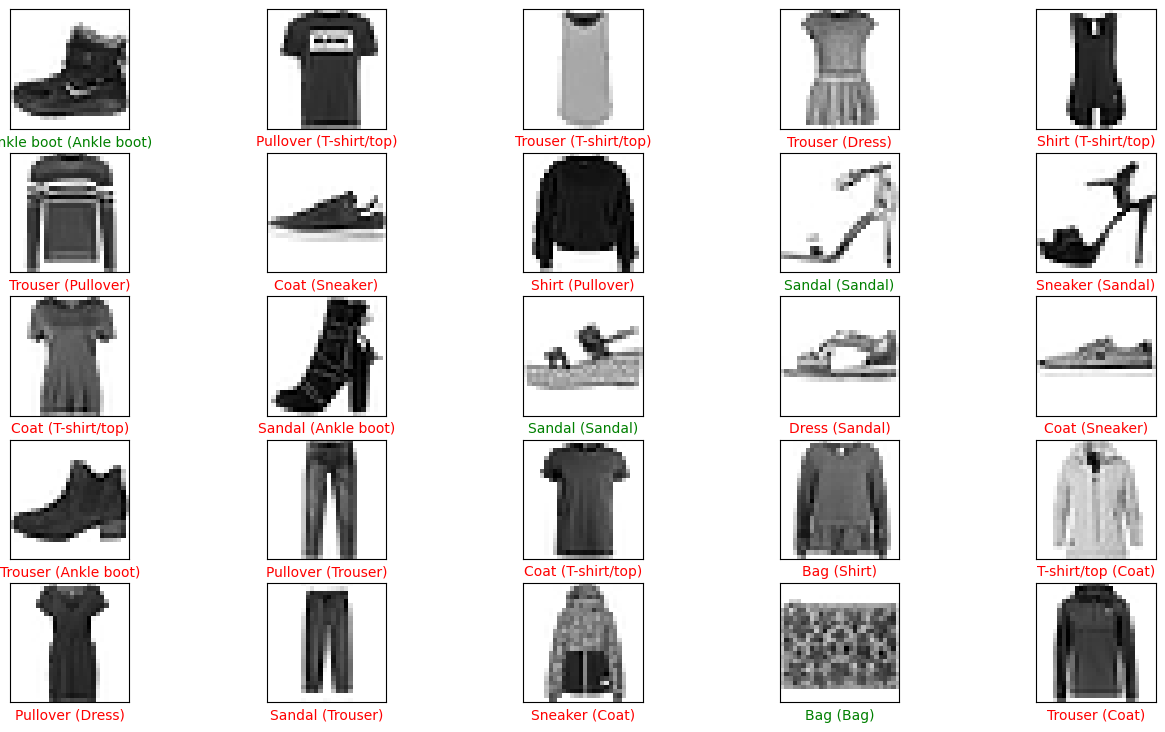

In [85]:
#show the predictions as a visualize
plt.figure(figsize=(16,9))
plt.title('Predictions')
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])

  if predictions[i] == train_labels[i]:
    color = 'g'
  else:
    color = 'r'
  plt.imshow(train_data[i], cmap= plt.cm.binary)
  plt.xlabel("{} ({})".format(class_names[predictions[i]],
                                  class_names[train_labels[i]]),
                                  color= color)
plt.show()

In [63]:
y_proba

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#Exercise 3:
Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

# Exercise 4:
Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

# Exercise 5:
 Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.